In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [4]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


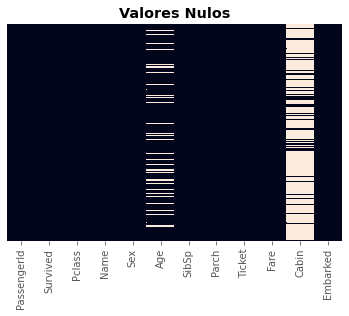

       Age : 19.87% valores nulos.
     Cabin : 77.1% valores nulos.
  Embarked : 0.22% valores nulos.


In [8]:
# Visualización de valores nulos
plt.figure(figsize=(6,4))
plt.title('Valores Nulos', fontweight='bold')
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)
plt.show()

# Porcentaje de valores nulos
nulls = train_data.isnull().sum()[train_data.isnull().sum()>0]
for x in nulls.index:
    print("{} : {}% valores nulos.".format(x.rjust(10), round(nulls[x]/len(train_data)*100, 2)))


In [9]:
# Elimino variables 
train_data.drop(['Cabin','PassengerId','Name'], axis=1, inplace=True)

In [10]:
# Valores únicos por variable
for var in train_data.columns:
    if train_data[var].nunique() <= 12:
        print('{} : {}'.format(var.rjust(10), train_data[var].unique()))

  Survived : [0 1]
    Pclass : [3 1 2]
       Sex : ['male' 'female']
     SibSp : [1 0 3 4 2 5 8]
     Parch : [0 1 2 5 3 4 6]
  Embarked : ['S' 'C' 'Q' nan]


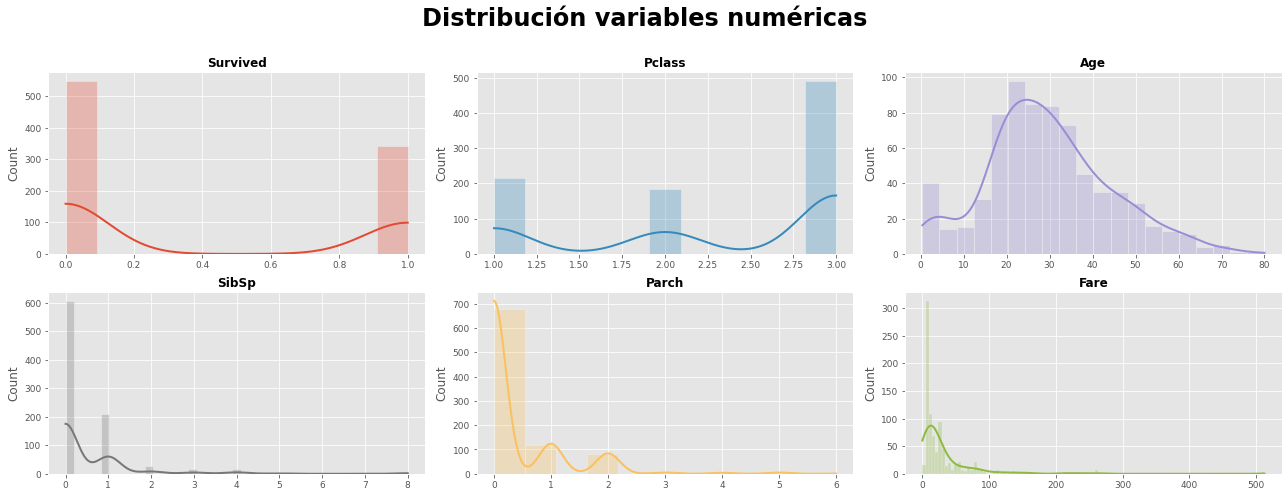

In [31]:
# Gráficos de distribución 
# ==============================================================================

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 7))
axes = axes.flat

num_features = train_data.select_dtypes(exclude='object')

for i, feat in enumerate(num_features.columns):
    sns.histplot(
        x       = train_data[feat].dropna(),
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(feat, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle('Distribución variables numéricas', fontsize = 24, fontweight = "bold");

## Survived 

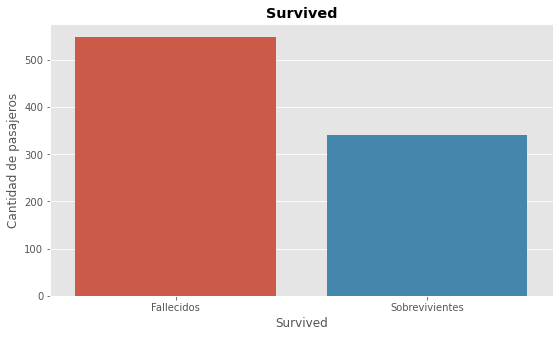

In [12]:
plt.figure(figsize=(9,5))
plt.title('Survived', fontweight='bold')
sns.countplot(x=train_data.Survived)
plt.ylabel('Cantidad de pasajeros')
plt.xticks(ticks=[0,1], labels=['Fallecidos', 'Sobrevivientes'])
plt.show()

In [45]:
surv_1 = train_data[train_data.Survived==1]
surv_0 = train_data[train_data.Survived==0]

print('{}% de los pasajeros sobrevivieron'.format(round(len(surv_1)/len(train_data)*100),3))
print('{}% de los pasajeros fallecieron'.format(round(len(surv_0)/len(train_data)*100),3))

38% de los pasajeros sobrevivieron
62% de los pasajeros fallecieron


## Age

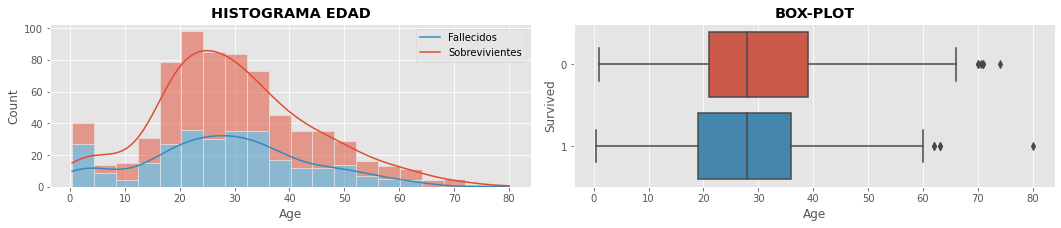

In [14]:
# Gráficas de distribución para la variable edad
# ==============================================================================
fig, ax = plt.subplots(1,2, figsize=(18,3))

ax[0].set_title("HISTOGRAMA EDAD", fontweight='bold')
ax[1].set_title("BOX-PLOT", fontweight='bold')

sns.histplot(x='Age', hue='Survived', data=train_data, multiple='stack', kde=True, ax=ax[0])
ax[0].legend(['Fallecidos','Sobrevivientes'])

sns.boxplot(x='Age', y='Survived', orient='h', data=train_data, ax=ax[1])


fig.subplots_adjust(wspace=0.09)
plt.show()

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Observación:</b> Mediante método visual, podemos observar que no existe diferencia significativa entre las edades
    de los pasajeros sobrevivientes y pasajeros fallecidos.
</div>

## Fare

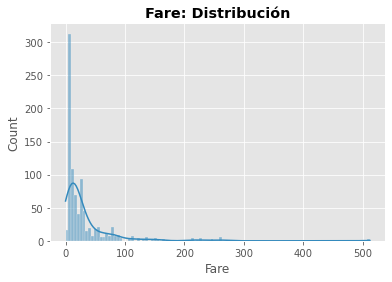

In [15]:
fig, ax = plt.subplots(figsize=(6,4))

ax.set_title('Fare: Distribución', fontweight='bold')
sns.histplot(x=train_data.Fare, kde=True, ax=ax)
plt.show()

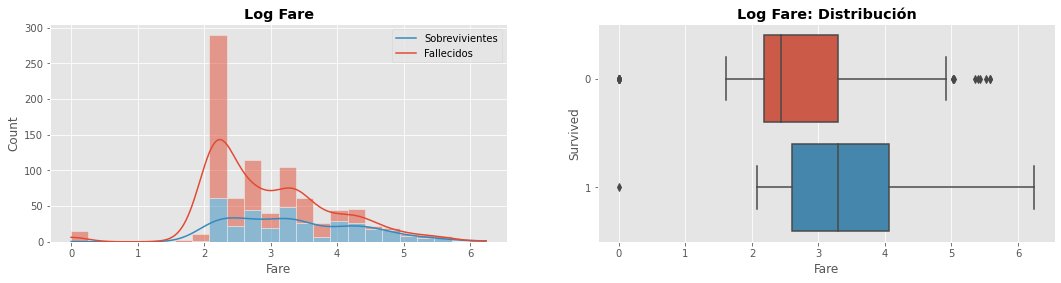

In [16]:
fig, ax = plt.subplots(1,2, figsize=(18,4))

log_fare = np.log1p(train_data.Fare)

ax[0].set_title('Log Fare', fontweight='bold')
sns.histplot(x=log_fare, hue=train_data.Survived, multiple='stack', kde=True, ax=ax[0])
ax[0].legend(['Sobrevivientes','Fallecidos'])

ax[1].set_title('Log Fare: Distribución', fontweight='bold')
sns.boxplot(x=log_fare, y=train_data.Survived, orient='h', ax=ax[1])
plt.show()

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Observación:</b> Mediante método visual, podemos observar que no existe diferencia significativa entre la tarifa pagada por los pasajeros sobrevivientes y la pagada por lospasajeros fallecidos.
</div>

## Pclass

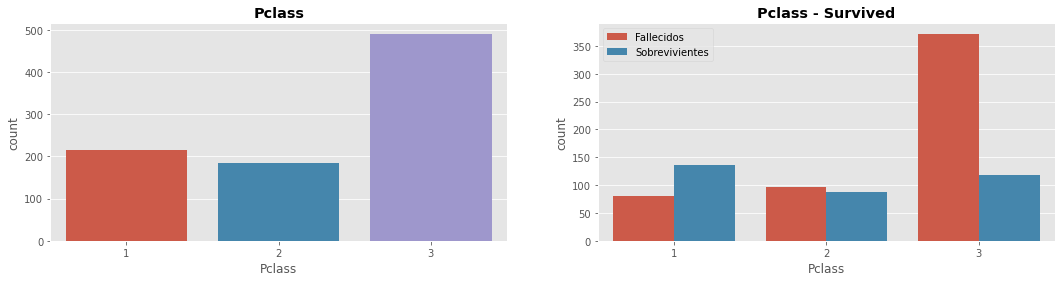

In [17]:
fig, ax = plt.subplots(1,2, figsize=(18,4))

ax[0].set_title('Pclass', fontweight='bold')
sns.countplot(x=train_data.Pclass, ax=ax[0])
#ax[0].legend(['1° class','2° class','3° class'])

ax[1].set_title('Pclass - Survived', fontweight='bold')
sns.countplot(x=train_data.Pclass, hue=train_data.Survived, ax=ax[1])
ax[1].legend(['Fallecidos','Sobrevivientes'], loc='best')
plt.show()

In [18]:
for clss in train_data.Pclass.unique():
    qty = len(train_data[train_data.Pclass==clss])
    pct = len(train_data[train_data.Pclass==clss]) / len(train_data) * 100
    spct = len(train_data[(train_data.Pclass==clss) & (train_data.Survived==1)]) / qty * 100
    fpct = len(train_data[(train_data.Pclass==clss) & (train_data.Survived==0)]) / qty * 100
    print('='*72)
    print('{}° Clase : {}({}%) pasajeros, {}% sobrevivieron, {}% fallecieron'.format(clss, qty, round(pct,1), round(spct,1), round(fpct,1)))
    print('='*72)

3° Clase : 491(55.1%) pasajeros, 24.2% sobrevivieron, 75.8% fallecieron
1° Clase : 216(24.2%) pasajeros, 63.0% sobrevivieron, 37.0% fallecieron
2° Clase : 184(20.7%) pasajeros, 47.3% sobrevivieron, 52.7% fallecieron


<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Observación:</b> 
</div>

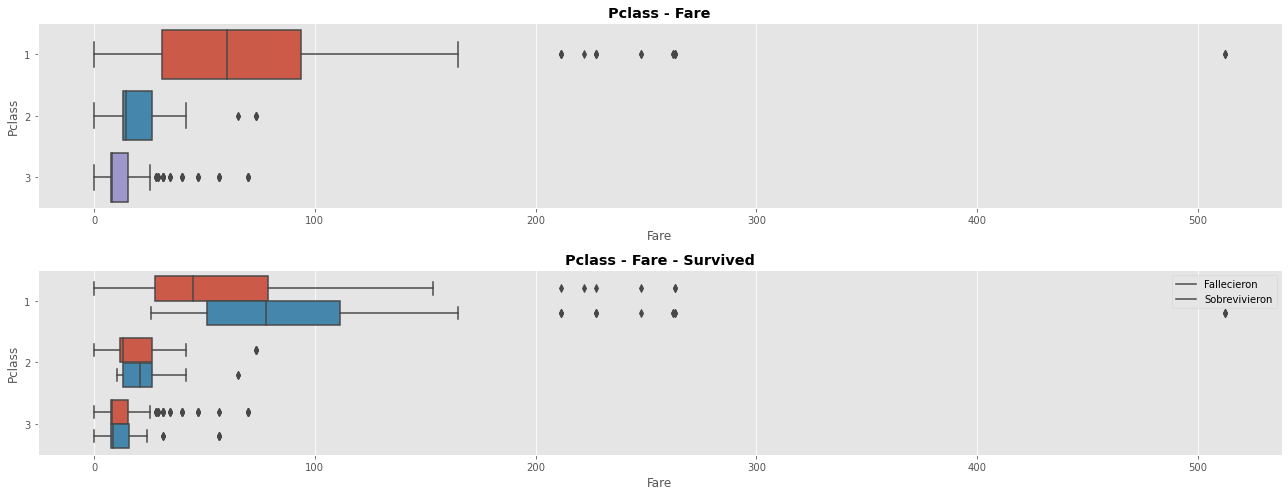

In [135]:
fig, ax = plt.subplots(2,1, figsize=(18,7))

ax[0].set_title('Pclass - Fare', fontweight='bold')
sns.boxplot(y='Pclass', x='Fare', orient='h', data=train_data, ax=ax[0])

ax[1].set_title('Pclass - Fare - Survived', fontweight='bold')
sns.boxplot(y='Pclass', x='Fare', hue='Survived', orient='h', data=train_data, ax=ax[1])
ax[1].legend(['Fallecieron','Sobrevivieron'])

plt.tight_layout()
plt.show()

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Observación:</b> Era de suponer que Pclass (clase en que viajó el pasajero) estaba relacionada con Fare (tarifa pagada por boleto), lo cual se comprueba al revisar la primera visualización (Pclass -Fare). Sin embargo, todas las Pclass contienen observaciones de pasajeros que no pagaron Fare.<br><br>
    
    También, podemos observar que la distribución de la tarifa de los pasajeros sobrevivientes en primera clase, es más alta que los que fallecieron. Incluso podemos ver que los pasajeros de primera clase que no pagaron o pagaron tarifas bajas,  
    
</div>

### Parch - SibSp

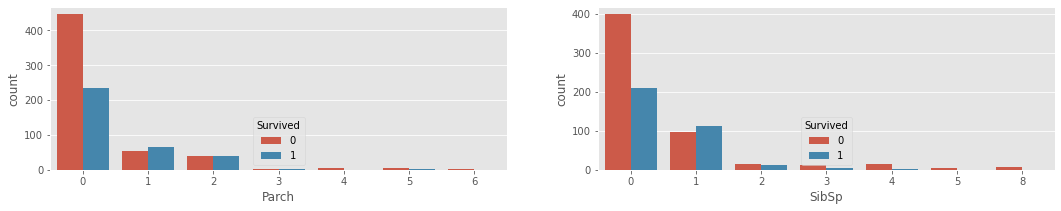

In [27]:
fig, ax = plt.subplots(1,2, figsize=(18,3))
sns.countplot(x=train_data.Parch, hue=train_data.Survived, ax=ax[0])
sns.countplot(x=train_data.SibSp, hue=train_data.Survived, ax=ax[1])
plt.show()

### Embarked

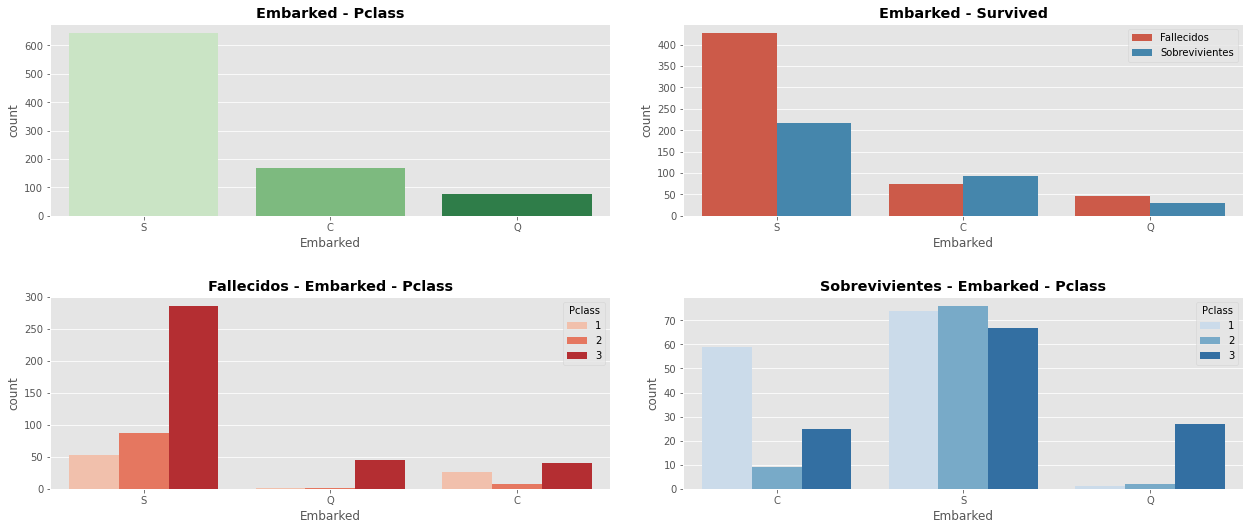

In [102]:
fig, ax =plt.subplots(2,2, figsize=(18,8))

ax[0,0].set_title('Embarked - Pclass', fontweight='bold')
sns.countplot(x=train_data.Embarked, ax=ax[0,0], palette='Greens')
                
ax[0,1].set_title('Embarked - Survived', fontweight='bold')
sns.countplot(x=train_data.Embarked, hue=train_data.Survived, ax=ax[0,1])
ax[0,1].legend(['Fallecidos','Sobrevivientes'])

ax[1,0].set_title('Fallecidos - Embarked - Pclass', fontweight='bold')
sns.countplot(x=surv_0.Embarked, hue=surv_0.Pclass, palette='Reds', ax=ax[1,0])

ax[1,1].set_title('Sobrevivientes - Embarked - Pclass', fontweight='bold')
sns.countplot(x=surv_1.Embarked, hue=surv_1.Pclass, palette='Blues', ax=ax[1,1])

plt.tight_layout(pad=3)
plt.show()

## Dimensiones Intrínsecas

In [35]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train = train_data.drop(['Ticket','Sex','Survived'], axis=1)

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'sample
pipeline.fit(X_train)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

ValueError: could not convert string to float: 'S'